In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#importer les fonction des tests
from scipy.stats import pearsonr #test de pearson
from scipy.stats import chi2 
from scipy.stats import chi2_contingency # test de khi2
from scipy.stats import f_oneway # test anova

Pour comprendre les détails théorique, je vous recommande ce cours gratuit de udacity: https://www.udacity.com/course/intro-to-inferential-statistics--ud201

In [ ]:
#importer les données
df=pd.read_csv('/content/penguins_size.csv')
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
#detecter les valeurs manquantes
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [ ]:
#supprimer les valeurs manquantes
df=df.dropna()
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [ ]:
#touver les valeurs unique de chaque colonne
df.nunique()

species                3
island                 3
culmen_length_mm     163
culmen_depth_mm       79
flipper_length_mm     54
body_mass_g           93
sex                    3
dtype: int64

In [ ]:
# compter les valeurs (on remarque que "sex" contient une ligne avec un ".")
df['sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [ ]:
#supprimer la ligne avec "."
df=df[df['sex']!='.']
df['sex'].value_counts()

MALE      168
FEMALE    165
Name: sex, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   culmen_length_mm   333 non-null    float64
 3   culmen_depth_mm    333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


# Est ce qu'il y a une relation entre culmen_length et body_mass?

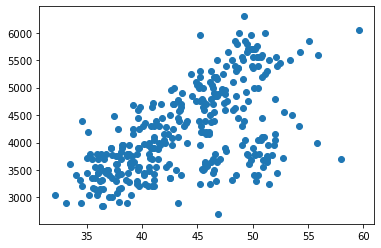

In [ ]:
plt.scatter(df["culmen_length_mm"],df["body_mass_g"])

D'apres le graphique, on ne voit pas une correlation entre les deux variables, nous allons faire un test statistique.

**Etapes d'un test statistique**

1- Poser les hypothèses (exemple personne coupable ou innocent: l'hypothèse h0: innocent H1: coupable)

2- Choisir le test statistique selon le type des variable: 
- variable quantitative vs quantitative: test Pearson
- variable qualitative vs qualitative: test de khi2
- variable quantitative vs qualitative: test de ANOVA

3- Calculer la p-valeur.

4- comparer la p-valeur à 0.05: 
- si la p-valeur est inférieur à 0.05: On rejette H0 (et on accepte H1.)
- Si la p-valeur est superieur à 0.05: on accepte H0

**Pour notre cas**

H0 (hypothèse null): Il n'y a pas de correlation entre culmen_length et body_mass.

H1 (hypothèse alternative): Il y a une correlation entre culmen_length et body_mass.

Dans ce cas, nous allons appliquer le test de Pearson.



In [ ]:
# on choisi le test de pearson
r,p_valeur=pearsonr(df["culmen_length_mm"],df["body_mass_g"])
print(p_valeur) #afficher la valeur de p-valeur

1.5386135144860734e-32


La p-valeur qu'on a trouvé est inferieur à 0.05, donc on rejette H0. donc il y a bien une correlation entre culmen_length et body_mass

##Est ce qu'il y a une correlation entre l'ile du pingouin et son espece?

In [ ]:
tableau_croise=pd.crosstab(df['island'],df['species'])
tableau_croise

species,Adelie,Chinstrap,Gentoo
island,,,
Biscoe,44,0,119
Dream,55,68,0
Torgersen,47,0,0


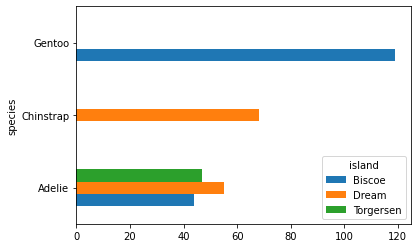

In [ ]:
tableau_croise.T.plot(kind='barh',ylabel='fréquence')

In [ ]:
# test statisque

**Hypothèses:**

H0: pas de correlation entre island et species

H1: il y a correlation entre island et species

**Choisir le type du test**
Pour ce cas, j'ai deux variables qualitatives: donc je vais opter pour un test de khi2


In [ ]:
#appliquer le test de khi2 et trouver la valeur de p-valeur
c,p_valeur,dof,expected=chi2_contingency(tableau_croise)
print(p_valeur)

2.2818915409873682e-60


La p-valeur qu'on a trouvé est inferieur à 0.05, donc on rejette H0. donc il y a bien une correlation entre island et species

# Est ce qu'il y a une relation entre le poids et le sex du pingouin?

In [ ]:
# test statisitque?
# hypothèses:
# H0: pas de correlation entre le poids et le sex
# H1: correlation entre le poids et le sex

In [ ]:
df_sex_poids=df[['body_mass_g','sex']]
df_sex_poids
groupes=pd.unique(df_sex_poids['sex'].values)
print(groupes)
# constituer le groupe de poids des males le groupe des females.
d_data={groupe:df_sex_poids['body_mass_g'][df_sex_poids.sex==groupe] for groupe in groupes}
d_data

['MALE' 'FEMALE']


{'MALE': 0      3750.0
 5      3650.0
 7      4675.0
 13     3800.0
 14     4400.0
         ...  
 333    5500.0
 335    5850.0
 337    6000.0
 341    5750.0
 343    5400.0
 Name: body_mass_g, Length: 168, dtype: float64, 'FEMALE': 1      3800.0
 2      3250.0
 4      3450.0
 6      3625.0
 12     3200.0
         ...  
 332    4650.0
 334    4375.0
 338    4925.0
 340    4850.0
 342    5200.0
 Name: body_mass_g, Length: 165, dtype: float64}

In [ ]:
F,p_valeur=f_oneway(d_data['MALE'],d_data['FEMALE'])
print(p_valeur)

4.897246751596325e-16


La p-valeur qu'on a trouvé est inferieur à 0.05, donc on rejette H0. donc il y a bien une correlation entre sex et body_mass

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


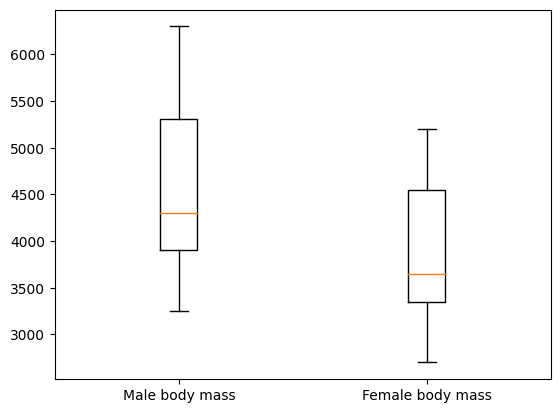

In [ ]:
#visualier les données de poids des males et females
plt.style.use('default')
plt.boxplot([d_data['MALE'],d_data['FEMALE']], labels=['Male body mass','Female body mass'])
plt.show()